In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [261]:
train=pd.read_csv('titanic_train.csv')

In [262]:
train.head(10) 
#To classify we have Survided, Pclass,Sex,Embarked Columns


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<AxesSubplot:>

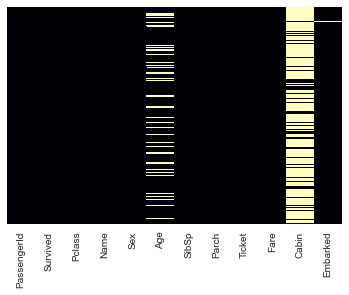

In [263]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='magma')

In [264]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

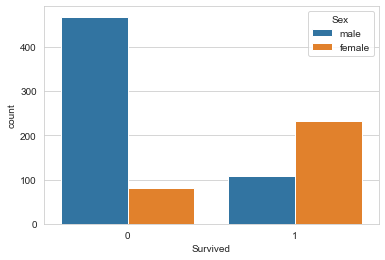

In [265]:
sns.countplot(x=train['Survived'],data=train,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

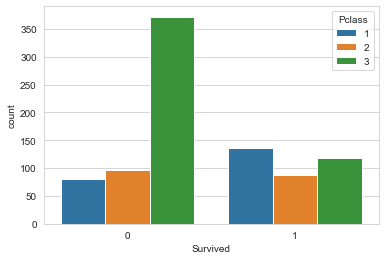

In [266]:
sns.countplot(x=train['Survived'],data=train,hue='Pclass')

c:\users\gayat\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age'>

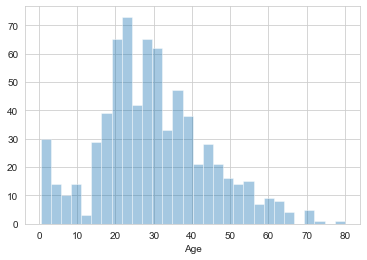

In [267]:
sns.distplot(train['Age'].dropna(),bins=30,kde=False)

<AxesSubplot:ylabel='Frequency'>

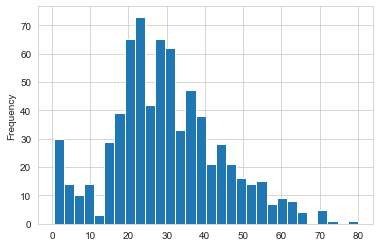

In [268]:
train['Age'].plot.hist(bins=30)

In [269]:
train['Age'].dropna().mean()

29.69911764705882

In [270]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

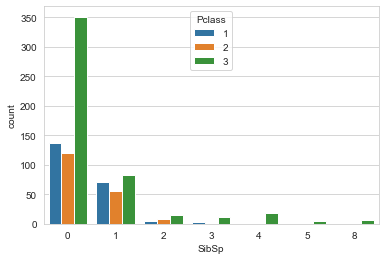

In [271]:
sns.countplot(x='SibSp',data=train,hue='Pclass')

<AxesSubplot:>

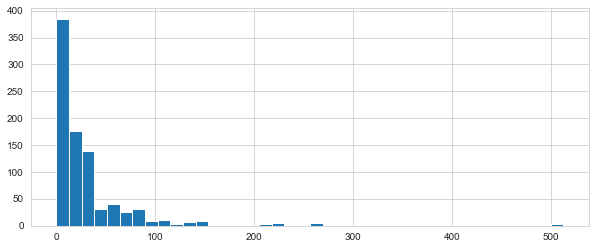

In [272]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [273]:
import cufflinks as cf

In [274]:
cf.go_offline()

In [275]:
train['Fare'].iplot(kind='hist',bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

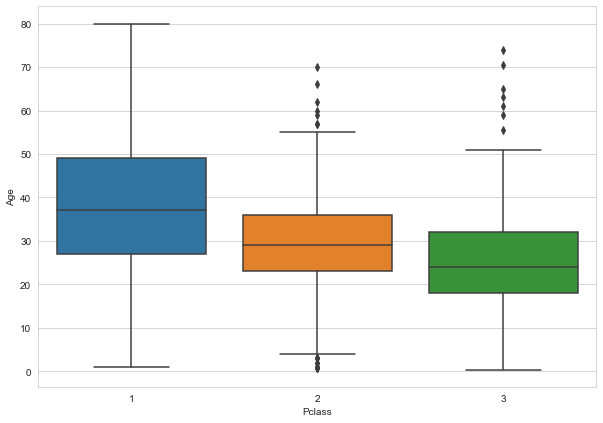

In [276]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [277]:
def impute_age(cols):
    Age=cols[0]
    print(Age)
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return train[train['Pclass']==1]['Age'].mean()
        elif Pclass==2:
            return train[train['Pclass']==2]['Age'].mean()
        elif Pclass==3:
            return train[train['Pclass']==3]['Age'].mean()
    else:
        return Age

In [278]:
train[train['Pclass']==3]['Age'].mean()

25.14061971830986

In [279]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

22.0
38.0
26.0
35.0
35.0
nan
54.0
2.0
27.0
14.0
4.0
58.0
20.0
39.0
14.0
55.0
2.0
nan
31.0
nan
35.0
34.0
15.0
28.0
8.0
38.0
nan
19.0
nan
nan
40.0
nan
nan
66.0
28.0
42.0
nan
21.0
18.0
14.0
40.0
27.0
nan
3.0
19.0
nan
nan
nan
nan
18.0
7.0
21.0
49.0
29.0
65.0
nan
21.0
28.5
5.0
11.0
22.0
38.0
45.0
4.0
nan
nan
29.0
19.0
17.0
26.0
32.0
16.0
21.0
26.0
32.0
25.0
nan
nan
0.83
30.0
22.0
29.0
nan
28.0
17.0
33.0
16.0
nan
23.0
24.0
29.0
20.0
46.0
26.0
59.0
nan
71.0
23.0
34.0
34.0
28.0
nan
21.0
33.0
37.0
28.0
21.0
nan
38.0
nan
47.0
14.5
22.0
20.0
17.0
21.0
70.5
29.0
24.0
2.0
21.0
nan
32.5
32.5
54.0
12.0
nan
24.0
nan
45.0
33.0
20.0
47.0
29.0
25.0
23.0
19.0
37.0
16.0
24.0
nan
22.0
24.0
19.0
18.0
19.0
27.0
9.0
36.5
42.0
51.0
22.0
55.5
40.5
nan
51.0
16.0
30.0
nan
nan
44.0
40.0
26.0
17.0
1.0
9.0
nan
45.0
nan
28.0
61.0
4.0
1.0
21.0
56.0
18.0
nan
50.0
30.0
36.0
nan
nan
9.0
1.0
4.0
nan
nan
45.0
40.0
36.0
32.0
19.0
19.0
3.0
44.0
58.0
nan
42.0
nan
24.0
28.0
nan
34.0
45.5
18.0
2.0
32.0
26.0
16.0
40.0
24.0
35.0
2

In [280]:
train['Pclass'].isnull().count

<bound method Series.count of 0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Pclass, Length: 891, dtype: bool>

<AxesSubplot:>

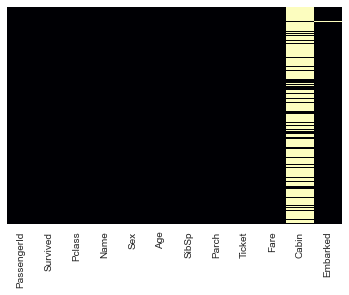

In [281]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='magma')

In [282]:
train.drop('Cabin',axis=1,inplace=True)

In [283]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


<AxesSubplot:>

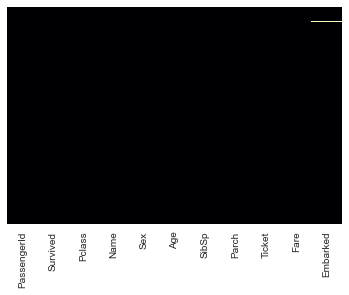

In [284]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='magma')

In [285]:
train['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [286]:
train.dropna(inplace=True)

<AxesSubplot:>

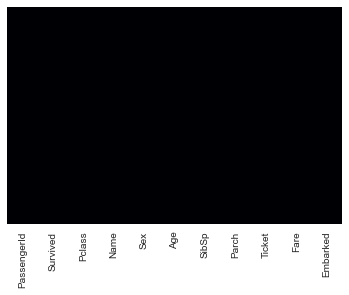

In [287]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='magma')

In [288]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [289]:
sex=pd.get_dummies(train['Sex'],drop_first=True)#Is male or Female

In [290]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [291]:
train=pd.concat([train,sex,embark],axis=1)

In [292]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C,1,0,0


In [293]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [294]:
train.head() #Perfect for ML

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [295]:
train.set_index('PassengerId')

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.00000,1,0,7.2500,1,0,1
2,1,1,38.00000,1,0,71.2833,0,0,0
3,1,3,26.00000,0,0,7.9250,0,0,1
4,1,1,35.00000,1,0,53.1000,0,0,1
5,0,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
887,0,2,27.00000,0,0,13.0000,1,0,1
888,1,1,19.00000,0,0,30.0000,0,0,1
889,0,3,25.14062,1,2,23.4500,0,0,1


In [296]:
train.drop('PassengerId',axis=1,inplace=True)

In [297]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [298]:
cls=pd.get_dummies(train['Pclass'],drop_first=True)

In [299]:
cls

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [300]:
train=pd.concat([train,cls],axis=1)

In [301]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.00000,1,0,7.2500,1,0,1,0,1
1,1,1,38.00000,1,0,71.2833,0,0,0,0,0
2,1,3,26.00000,0,0,7.9250,0,0,1,0,1
3,1,1,35.00000,1,0,53.1000,0,0,1,0,0
4,0,3,35.00000,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,1,0,1,1,0
887,1,1,19.00000,0,0,30.0000,0,0,1,0,0
888,0,3,25.14062,1,2,23.4500,0,0,1,0,1
889,1,1,26.00000,0,0,30.0000,1,0,0,0,0


In [303]:
train.drop('Pclass',axis=1,inplace=True)

In [304]:
train

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.00000,1,0,7.2500,1,0,1,0,1
1,1,38.00000,1,0,71.2833,0,0,0,0,0
2,1,26.00000,0,0,7.9250,0,0,1,0,1
3,1,35.00000,1,0,53.1000,0,0,1,0,0
4,0,35.00000,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.00000,0,0,13.0000,1,0,1,1,0
887,1,19.00000,0,0,30.0000,0,0,1,0,0
888,0,25.14062,1,2,23.4500,0,0,1,0,1
889,1,26.00000,0,0,30.0000,1,0,0,0,0


In [306]:
x=train.drop('Survived',axis=1)
y=train['Survived']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=101)

In [307]:
from sklearn.linear_model import LogisticRegression

In [308]:
logmodel=LogisticRegression()

In [309]:
logmodel.fit(xtrain,ytrain)

c:\users\gayat\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [310]:
pred=logmodel.predict(xtest)

In [314]:
from sklearn.metrics import classification_report

In [317]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       182
           1       0.68      0.84      0.75        85

    accuracy                           0.82       267
   macro avg       0.80      0.83      0.81       267
weighted avg       0.84      0.82      0.83       267



In [320]:
from sklearn.metrics import confusion_matrix

In [321]:
confusion_matrix(ytest,pred)

array([[149,  14],
       [ 33,  71]], dtype=int64)